<a href="https://colab.research.google.com/github/moon2su/ML-programming/blob/main/BP_prediction_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩 함수

In [2]:
def load_signals_from_mat(mat_path, num_samples = 5):
  """- parameters
  mat_path : .mat 파일 경로
  num_samples : 로드할 샘플 갯수"""

  # PPG(광용적 맥파), ABP(혈압 파형), ECG(심전도), SBP(수축기 혈압), DBP(이완기 혈압)
  signals = {'ppg': [], 'abp': [], 'ecg': [], 'sbp': [], 'dbp': []}

  with h5py.File(mat_path, 'r') as f:
    #데이터 참조 가져오기
    ppg_refs = f['Subj_Wins']['PPG_F'][0]
    abp_refs = f['Subj_Wins']['ABP_F'][0] if 'ABP_F' in f['Subj_Wins'] else None
    ecg_refs = f['Subj_Wins']['ECG_F'][0] if 'ECG_F' in f['Subj_Wins'] else None
    sbp_refs = f['Subj_Wins']['SegSBP'][0]
    dbp_refs = f['Subj_Wins']['SegDBP'][0]

    #지정된 개수만큼 로드
    total = min(len(ppg_refs), num_samples)

    for i in range(total):
      #PPG Signal
      ppg = f[ppg_refs[i]][()].squeeze().astype(np.float32)
      signals['ppg'].append(ppg)

      #ABP Signal (있는 경우)
      if abp_refs is not None:
        abp = f[abp_refs[i]][()].squeeze().astype(np.float32)
        signals['abp'].append(abp)

      #ECG Signal (있는 경우)
      if ecg_refs is not None:
        ecg = f[ecg_refs[i]][()].squeeze().astype(np.float32)
        signals['ecg'].append(ecg)

      # 혈압 타겟
      sbp = float(f[sbp_refs[i]][()][0][0])
      dbp = float(f[dbp_refs[i]][()][0][0])
      signals['sbp'].append(sbp)
      signals['dbp'].append(dbp)

  return signals

# 신호 시각화 함수

In [3]:
def plot_signals(signals, sample_idx=0, fs=125):
  """parameters
  signals : load_signals_from_mat()의 반환값
  sample_idx : 표시할 샘플 인덱스
  fs : 샘플링 주파수(Hz)"""

  #서브 플룻 개수 계산
  num_plots = 1 #PPG는 항상 있음
  if signals['abp']: num_plots += 1
  if signals['ecg']: num_plots += 1

  fig, axes = plt.subplots(num_plots, 1, figsize = (14, 3*num_plots))
  if num_plots == 1:
    axes = [axes]

  plot_idx = 0

  #PPG Signal
  ppg = signals['ppg'][sample_idx]
  time_ppg = np.arange(len(ppg)) / fs
  axes[plot_idx].plot(time_ppg, ppg, 'b-', linewidth=1.2)
  axes[plot_idx].set_title(f'PPG Signal (Sample {sample_idx})', fontsize=12, fontweight='bold')
  axes[plot_idx].set_xlabel('Time (s)')
  axes[plot_idx].set_ylabel('Amplitude')
  axes[plot_idx].grid(True, alpha=0.3)
  plot_idx += 1

  #ABP Signal
  if signals['abp']:
    abp = signals['abp'][sample_idx]
    time_abp = np.arange(len(abp)) / fs
    axes[plot_idx].plot(time_abp, abp, 'r-', linewidth = 1.2)
    sbp, dbp = signals['sbp'][sample_idx], signals['dbp'][sample_idx]
    axes[plot_idx].set_title(f'ABP Signal (SBP={sbp:.1f}, DBP = {dbp:.1f} mmHg)',
                             fontsize = 12, fontweight ='bold')
    axes[plot_idx].set_xlabel('Time (s)')
    axes[plot_idx].set_ylabel('Pressure (mmHg)')
    axes[plot_idx].grid(True, alpha = 0.3)
    plot_idx += 1

  #ECG Signal
  if signals['ecg']:
    ecg = signals['ecg'][sample_idx]
    time_ecg = np.arange(len(ecg)) / fs
    axes[plot_idx].plot(time_ecg, ecg, 'g-', linewidth = 1.2)
    axes[plot_idx].set_title(f'ECG Signal (Sample {sample_idx})', fontsize = 12, fontweight = 'bold')
    axes[plot_idx].set_xlabel('Time (s)')
    axes[plot_idx].set_ylabel('Amplitude (mV)')
    axes[plot_idx].grid(True, alpha = 0.3)

  plt.tight_layout()
  plt.show()

# 다중 샘플 비교 시각화

In [4]:
def plot_multiple_samples(signals, num_samples = 3, signal_type='ppg', fs=125):
  """parameters
  signals : 로드된 신호 데이터
  num_samples : 표시할 샘플 개수
  signal_type : 'ppg'. 'abp', 'ecg' 중 선택
  fs : 샘플링 주파수(Hz)"""

  fig, axes = plt.subplots(num_samples, 1, figsize=(14, 3*num_samples))
  if num_samples == 1:
    axes = [axes]

  signal_data = signals[signal_type]
  colors = ['blue', 'red', 'green']

  for i in range(min(num_samples, len(signal_data))):
    sig = signal_data[i]
    time = np.arange(len(sig)) / fs
    axes[i].plot(time, sig, color=colors[i % 3], linewidth=1.2)

    title = f'{signal_type.upper()} Signal - Sample {i}'
    if signal_type == 'ppg' and signals['sbp']:
      title += f'(SBP={signals["sbp"][i]:.1f}, DBP={signals["dbp"][i]:.1f} mmHg)'

    axes[i].set_title(title, fontsize = 11, fontweight = 'bold')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Amplitude')
    axes[i].grid(True, alpha = 0.3)

  plt.tight_layout()
  plt.show()

Loading signals from .mat file...
Loaded 5 samples of PPG signals.
Loaded 5 samples of ABP signals.
Loaded 5 samples of ECG signals.

Plotting sample 0...


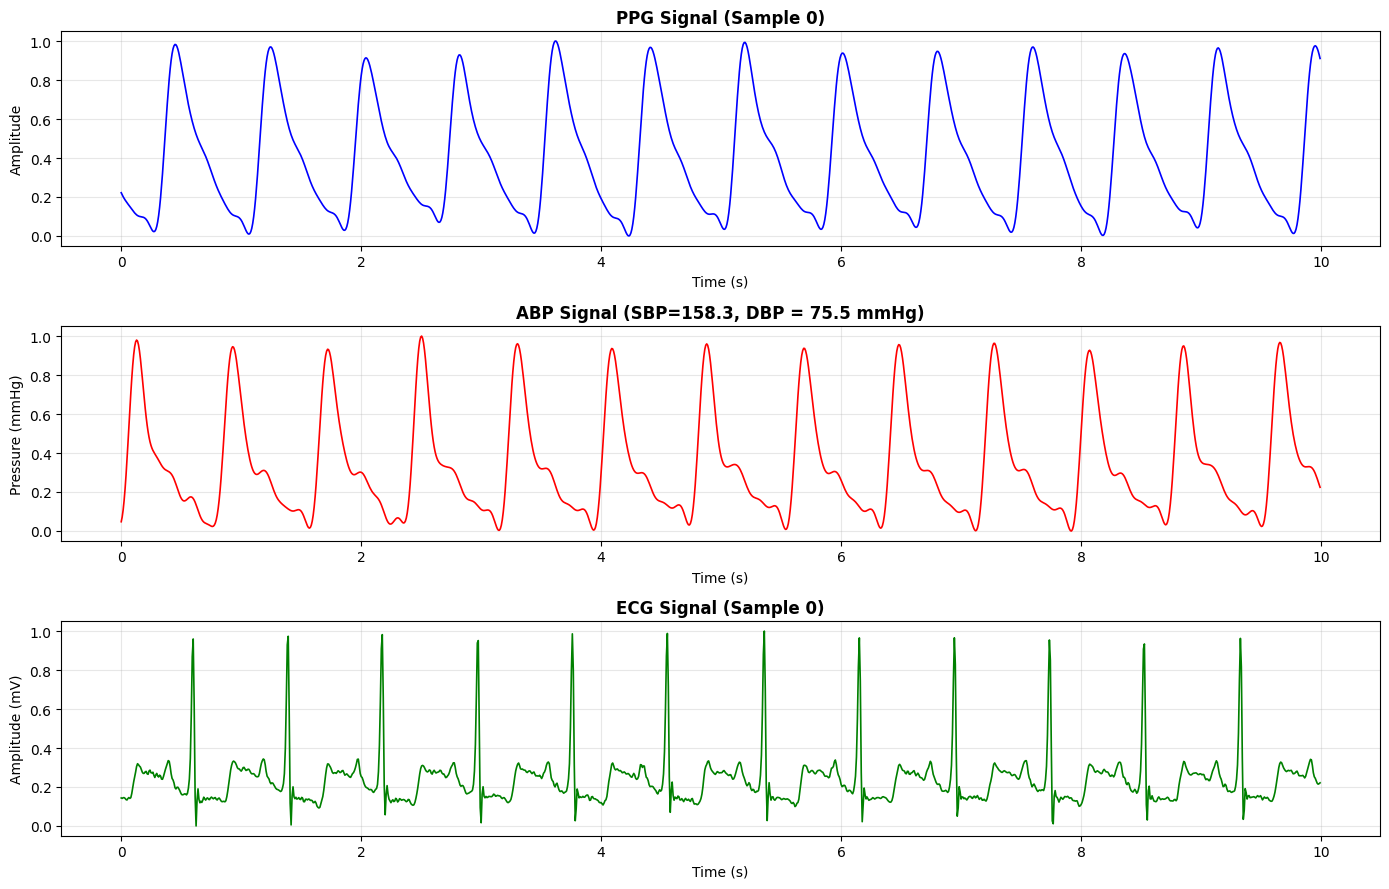


Plotting multiple samples of PPG signals...


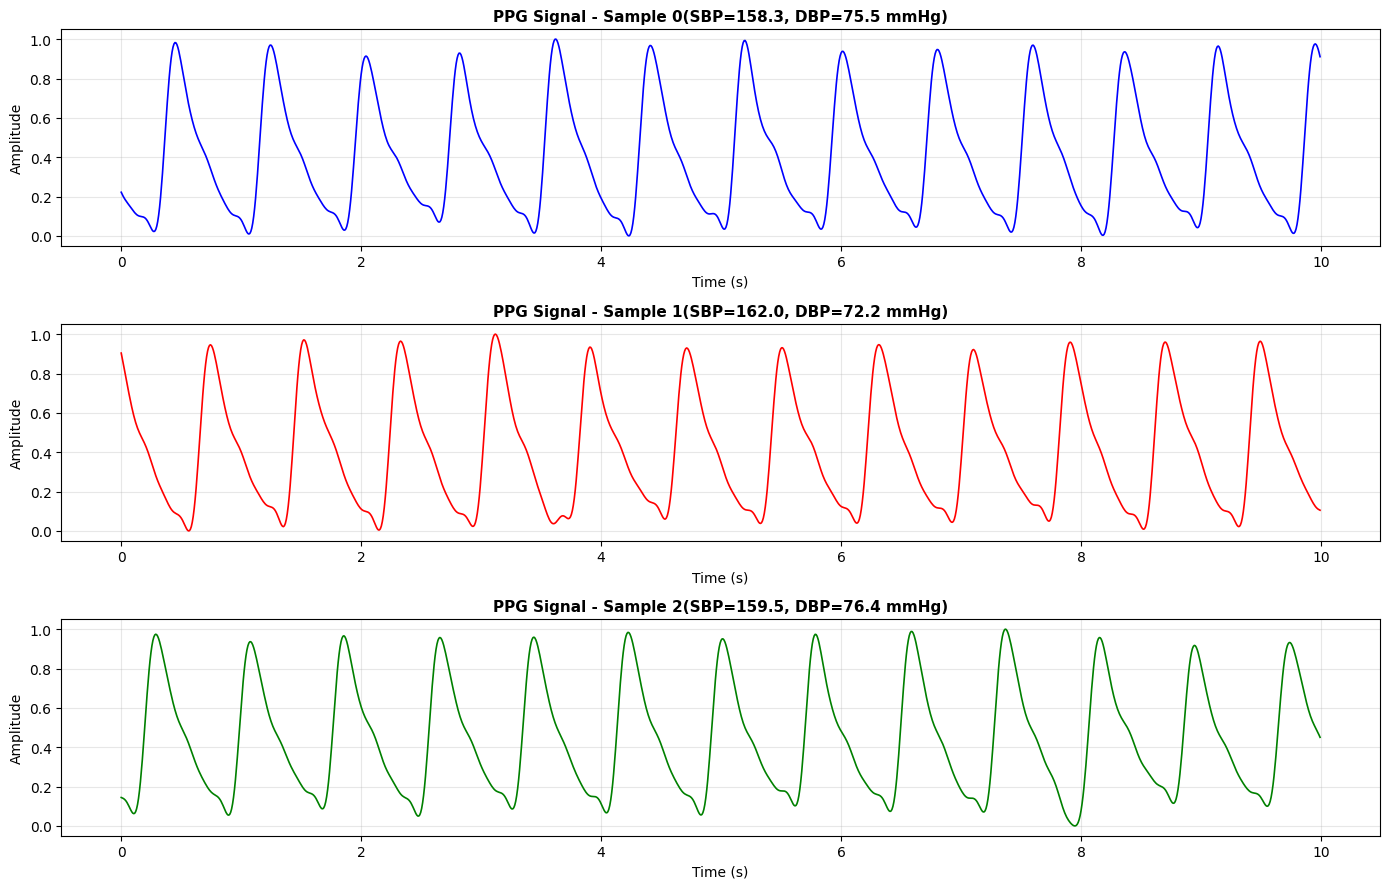


=== Signal Statistics ===
Sample 0: SBP=158.3 mmHg, DBP = 75.5 mmHg, PPG length=1250 samples (10.00s)
Sample 1: SBP=162.0 mmHg, DBP = 72.2 mmHg, PPG length=1250 samples (10.00s)
Sample 2: SBP=159.5 mmHg, DBP = 76.4 mmHg, PPG length=1250 samples (10.00s)
Sample 3: SBP=161.7 mmHg, DBP = 77.1 mmHg, PPG length=1250 samples (10.00s)
Sample 4: SBP=160.9 mmHg, DBP = 76.8 mmHg, PPG length=1250 samples (10.00s)


In [5]:
if __name__ == "__main__":
  mat_path = "/content/drive/MyDrive/Colab Notebooks/BP/p087608.mat"

  # 1. 데이터 로딩
  print("Loading signals from .mat file...")
  signals = load_signals_from_mat(mat_path, num_samples = 5)

  print(f"Loaded {len(signals['ppg'])} samples of PPG signals.")
  print(f"Loaded {len(signals['abp'])} samples of ABP signals.")
  print(f"Loaded {len(signals['ecg'])} samples of ECG signals.")

  # 2. 단일 샘플 시각화 (모든 신호 타입)
  print("\nPlotting sample 0...")
  plot_signals(signals, sample_idx = 0, fs = 125)

  # 3. PPG 신호 여러 샘플 비교
  print("\nPlotting multiple samples of PPG signals...")
  plot_multiple_samples(signals, num_samples = 3, signal_type = "ppg", fs = 125)

  # 4. 통계 정보 출력
  print("\n=== Signal Statistics ===")
  for i, (sbp, dbp) in enumerate(zip(signals['sbp'], signals['dbp'])):
    ppg_len = len(signals['ppg'][i])
    print(f"Sample {i}: SBP={sbp:.1f} mmHg, DBP = {dbp:.1f} mmHg, "
          f"PPG length={ppg_len} samples ({ppg_len/125:.2f}s)")